In [1]:
# pip install tensorflow
# pip install tflearn
# pip install tqdm

In [2]:
! pip show tensorflow

In [ ]:
! pip uninstall tensorflow

In [3]:
! pip install tflearn

  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=ed1da3336d32b38ae89940e78cfa1fea9871774e17da5b241c258bcea83dde56
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\4a\d5\f8\9585b4a100c0fd73da204ee785457d67c85e1b9050f009a849
Successfully built tflearn


In [4]:
! pip install tensorflow==1.14

ERROR: Could not find a version that satisfies the requirement tensorflow==1.14 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==1.14


In [5]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

TRAIN_DIR='C:/Users/user/Downloads/train-20241213T024841Z-001.train.jpg'
TEST_DIR='C:/Users/user/Downloads/test-20241213T023247Z-001.jpg'
IMG_SIZE=50
LR=1e-3             # learning rate
MODEL_NAME = 'dogs-vs-cats-convnet'
#MODEL_NAME='dogsvscats-{}-{}.model'.format(LR, '6conv-basic-video')

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
def label_img(img):
    word_label=img.split('.')[-3]
    if word_label== 'cat': return[1,0]
    elif word_label =='dog': return[0,1]

In [3]:
def create_train_data():
    training_data=[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label=label_img(img)
        path=os.path.join(TRAIN_DIR, img)
        img=cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [4]:
def create_test_data():
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path=os.path.join(TEST_DIR,img)
        img_num=img.split('.')[0]
        img=cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [5]:
train_data=create_train_data()
test_data=create_test_data()

# if you already have train data:
#train_data=np.load('train_data.npy')
# test_data=np.load('test_data.npy')

100%|██████████| 11941/11941 [01:22<00:00, 144.72it/s]
C:\Users\USER2018\anaconda4\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
100%|██████████| 6000/6000 [00:32<00:00, 186.07it/s]


In [6]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

#tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

INFO:tensorflow:Restoring parameters from C:\Users\USER2018\dogs-vs-cats-convnet
model loaded!


In [8]:
train=train_data[:-600]
test=train_data[-600:]

In [9]:
X=np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y=[i[1] for i in train]

test_x=np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y=[i[1] for i in test]

In [10]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, 
    validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 22610  | total loss: 0.03964 | time: 13.103s
| Adam | epoch: 005 | loss: 0.03964 - acc: 0.9849 -- iter: 11328/11341
Training Step: 22611  | total loss: 0.04422 | time: 14.186s
| Adam | epoch: 005 | loss: 0.04422 - acc: 0.9833 | val_loss: 0.04274 - val_acc: 0.9833 -- iter: 11341/11341
--


In [11]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\USER2018\dogs-vs-cats-convnet is not in all_model_checkpoint_paths. Manually adding it.


Cat Possibility: 95.67% 
Dog Possibility:  4.33%


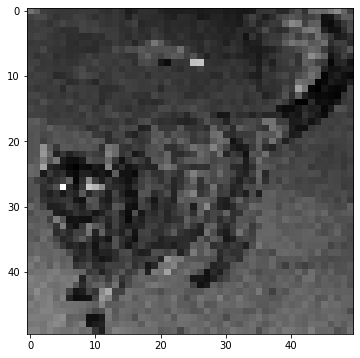

In [12]:
d = test_data[0]
img_data, img_num = d

data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([data])[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")

print('Cat Possibility: {:5.2f}% \nDog Possibility: {:5.2f}%'.format(prediction[0]*100, prediction[1]*100))

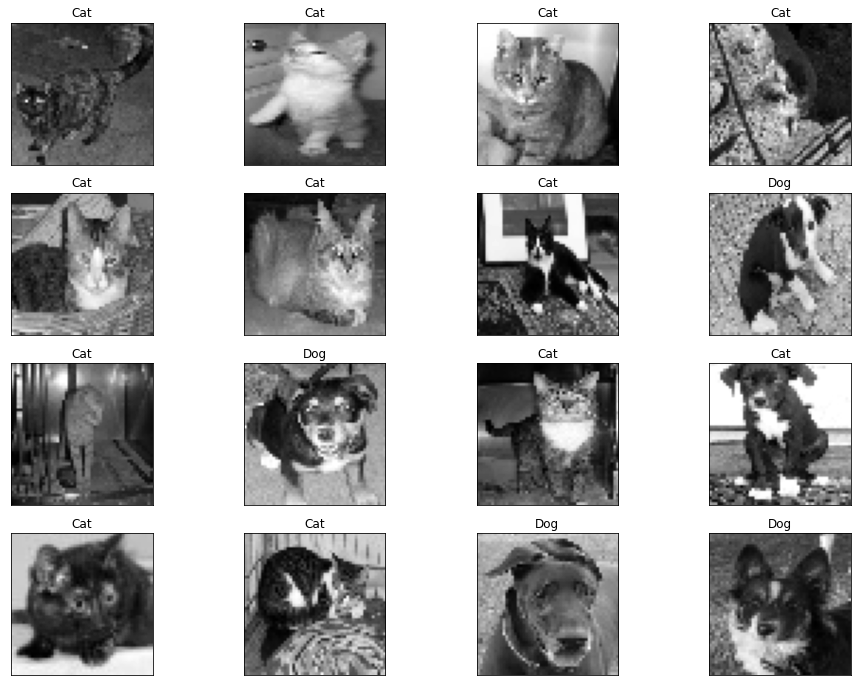

In [13]:
fig=plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data[:16]):
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(4, 4, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: 
        str_label='Dog'
    else:
        str_label='Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [18]:
# Using our Network - Using Convolutional Neural Network to Identify Dogs vs Cats p. 1-4
# https://www.youtube.com/watch?v=gT4F3HGYXf4
# https://www.youtube.com/watch?v=Ge65ukmJTzQ
# https://www.youtube.com/watch?v=ViO56ASqeks&t=907s
# https://www.youtube.com/watch?v=27FPv1VHSsQ

In [ ]:
# https://medium.com/@curiousily/tensorflow-for-hackers-part-iii-convolutional-neural-networks-c077618e590b